In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy

In [2]:
from py.utils import verifyDir

In [3]:
DATA_PATH = "data/PlacePulse_2/"

QSCORE_PATH = f"{DATA_PATH}/Qscores/all/Summaries/"

MAIN_OUT_PATH = "outputs/"

OUT_DETECT_PATH = f"{MAIN_OUT_PATH}segmentations/"

OUT_IMAGE_PATH = f"{MAIN_OUT_PATH}segmented_images/"

CACHE_PATH = f"{MAIN_OUT_PATH}/cache/"

In [4]:
verifyDir(CACHE_PATH)

### Drawing features presence

In [5]:
pp_df = pd.read_csv(f"{QSCORE_PATH}summary_safety.csv", low_memory=False)
pp_df.rename(columns={"ID": "image_file_name"}, inplace=True)
pp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111389 entries, 0 to 111388
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   image_file_name       111389 non-null  object 
 1   safety                111389 non-null  float64
 2   W_ratio_safety        111389 non-null  float64
 3   L_ratio_safety        111389 non-null  float64
 4   wins_safety           111389 non-null  int64  
 5   draws_safety          111389 non-null  int64  
 6   losses_safety         111389 non-null  int64  
 7   wins_against_safety   111389 non-null  object 
 8   loss_against_safety   111389 non-null  object 
 9   draws_against_safety  111389 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 8.5+ MB


In [6]:
segment_city_df = pd.read_csv(f"{MAIN_OUT_PATH}objects_deeplab_xception.csv", sep=";", low_memory=False)

In [7]:
df_ = segment_city_df.loc[:, (segment_city_df != 0).any(axis=0)].copy()
df_["image_file_name"] = df_["image_file_name"].apply(lambda x: x.split("_")[2])
df_

,image_file_name,wall,building,sky,floor,tree,ceiling,road,bed,windowpane,...,pier,crt,plate,monitor,bulletin,shower,radiator,glass,clock,flag
0,513cc058fdc9f0358700137e,0.000000,4.187520,43.906657,0.0,5.482992,0.0,28.821309,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,513cc646fdc9f03587001930,0.000000,0.015767,31.339518,0.0,23.216248,0.0,34.255981,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,513d35bffdc9f03587002b1e,0.000000,4.181417,42.042542,0.0,7.662964,0.0,25.940959,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,513cc072fdc9f0358700139b,0.000000,1.689148,43.962606,0.0,6.894430,0.0,24.218750,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,513cc0eafdc9f03587001413,0.000000,0.000000,48.340352,0.0,2.666219,0.0,37.083435,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110983,5140b899fdc9f04926001ca5,0.000000,0.699870,42.807007,0.0,10.089620,0.0,14.684041,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110984,5140b75efdc9f049260019a9,0.000000,5.694580,29.054769,0.0,14.404806,0.0,10.788472,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110985,5140b909fdc9f04926001d7d,0.348918,9.884135,34.589640,0.0,12.540181,0.0,16.451518,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110986,5140b8b6fdc9f04926001cdc,0.436910,20.867920,31.451925,0.0,9.117635,0.0,3.922526,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


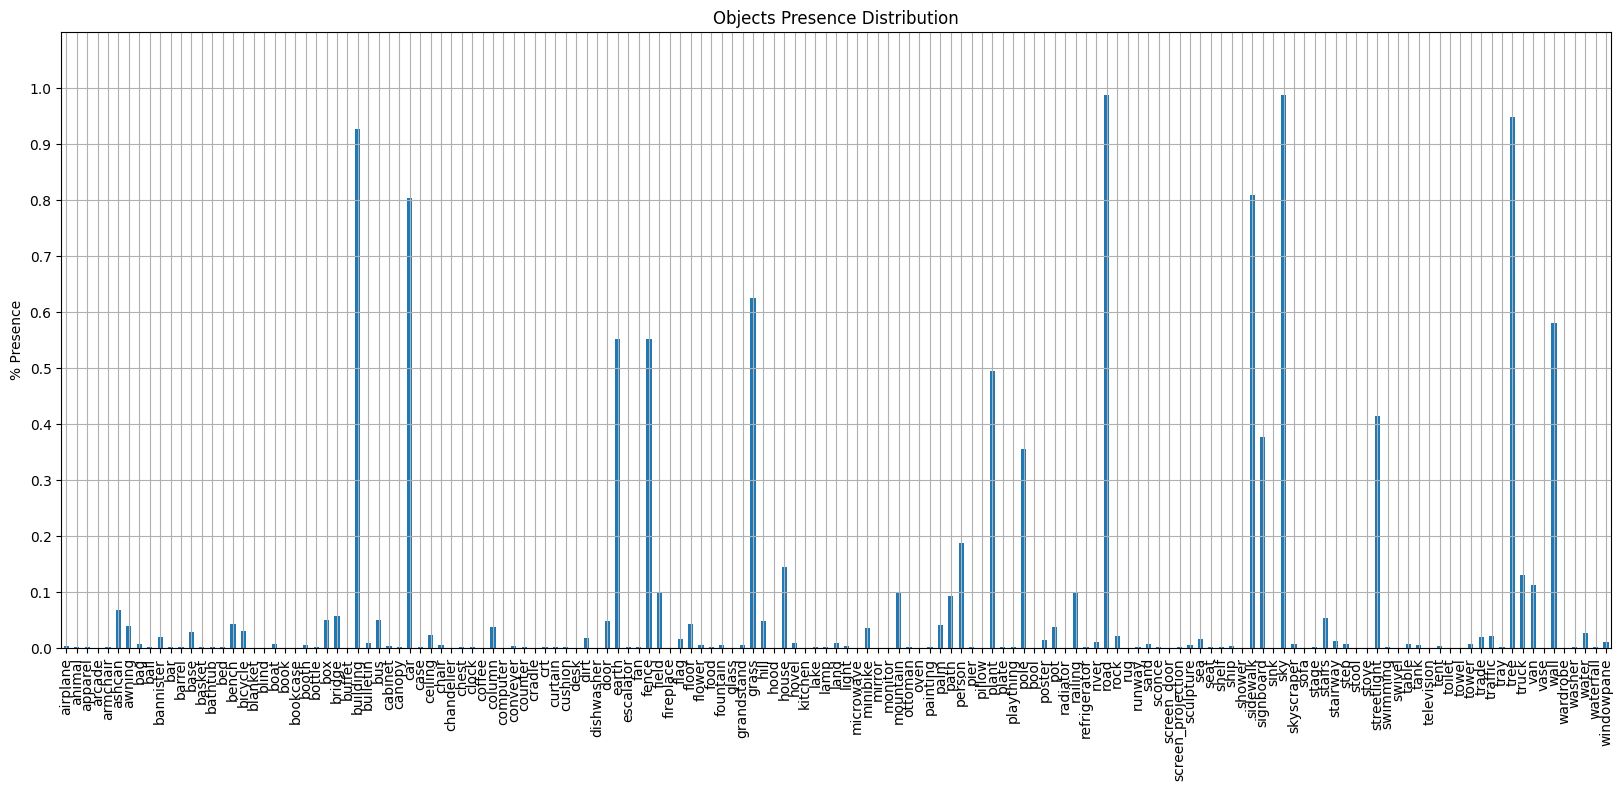

In [8]:
# Total
X_df = df_.iloc[:, 1:].copy()
X_df = X_df[np.sort(X_df.columns)]
X_df[X_df > 0] = 1

sum_df = X_df.sum()/len(X_df)

ax = sum_df.plot(kind="bar", figsize=(20,8), ylabel="% Presence", rot=90, ylim=(0.0,1.1), yticks=list(np.arange(0,1.1,0.10)))
plt.title(f"Objects Presence Distribution")
plt.grid(True)
plt.show()
# plt.savefig(f"{MAIN_OUT_PATH}objects_distribution.png", bbox_inches='tight', pad_inches = 0.5)
# plt.clf()
# plt.cla()
# plt.close()

### Generating samples 

In [9]:
data_df = pd.merge(df_, pp_df[["image_file_name", "safety"]], on="image_file_name", how="left")
data_df["labels"] = data_df["safety"].apply(lambda x: 1 if x>=5.0 else 0 )
data_df

,image_file_name,wall,building,sky,floor,tree,ceiling,road,bed,windowpane,...,plate,monitor,bulletin,shower,radiator,glass,clock,flag,safety,labels
0,513cc058fdc9f0358700137e,0.000000,4.187520,43.906657,0.0,5.482992,0.0,28.821309,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.520084,0
1,513cc646fdc9f03587001930,0.000000,0.015767,31.339518,0.0,23.216248,0.0,34.255981,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.333333,0
2,513d35bffdc9f03587002b1e,0.000000,4.181417,42.042542,0.0,7.662964,0.0,25.940959,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.333333,0
3,513cc072fdc9f0358700139b,0.000000,1.689148,43.962606,0.0,6.894430,0.0,24.218750,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.634921,1
4,513cc0eafdc9f03587001413,0.000000,0.000000,48.340352,0.0,2.666219,0.0,37.083435,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.811105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110983,5140b899fdc9f04926001ca5,0.000000,0.699870,42.807007,0.0,10.089620,0.0,14.684041,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.373219,0
110984,5140b75efdc9f049260019a9,0.000000,5.694580,29.054769,0.0,14.404806,0.0,10.788472,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.333333,0
110985,5140b909fdc9f04926001d7d,0.348918,9.884135,34.589640,0.0,12.540181,0.0,16.451518,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.017316,1
110986,5140b8b6fdc9f04926001cdc,0.436910,20.867920,31.451925,0.0,9.117635,0.0,3.922526,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.211386,1


In [10]:
Y_df = data_df.iloc[:, -1].copy()
X_df = data_df.iloc[:, 1:-2].copy()
X_df.shape, Y_df.shape

((110988, 149), (110988,))

### Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

### Classifiers

In [13]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

In [14]:
random_state = 42
regularizer_value = np.logspace(-3, 3, num=7)
class_weight = [None, 'balanced']
type_scaler = ['passthrough', scaler]
#dim_reductor = [t_svd, pca, sparse_pca]
type_penalty = ['l1', 'l2']

In [15]:
lr = LogisticRegression(
    tol=1e-3,
    dual=False,  # Prefer dual=False when n_samples > n_features
    random_state=random_state,
    max_iter=1e3,
)

param_lr = {}
param_lr['scaler'] = copy.deepcopy(type_scaler)
#param_lr['dim_reductor'] = copy.deepcopy(dim_reductor)
param_lr['classifier__C'] = copy.deepcopy(regularizer_value)
param_lr['classifier__class_weight'] = copy.deepcopy(class_weight)
param_lr['classifier__penalty'] = copy.deepcopy(type_penalty)
param_lr['classifier'] = [lr]

In [16]:
ridge = RidgeClassifier(
    tol=1e-3,
    random_state=random_state,
    max_iter=1e3,
)

param_ridge = {}
param_ridge['scaler'] = copy.deepcopy(type_scaler)
# param_ridge['dim_reductor'] = copy.deepcopy(dim_reductor)
param_ridge['classifier__alpha'] = copy.deepcopy(regularizer_value)
param_ridge['classifier__class_weight'] = copy.deepcopy(class_weight)
param_ridge['classifier'] = [ridge]

In [17]:
linear_svm = LinearSVC(
    tol=1e-3,
    random_state=42,
    max_iter=1e3,
)


param_linear_svm = {}
param_linear_svm['scaler'] = copy.deepcopy(type_scaler)
# param_linear_svm['dim_reductor'] = copy.deepcopy(dim_reductor)
param_linear_svm['classifier__C'] = copy.deepcopy(regularizer_value)
param_linear_svm['classifier__class_weight'] = copy.deepcopy(class_weight)
param_linear_svm['classifier__penalty'] = copy.deepcopy(type_penalty)
param_linear_svm['classifier'] = [linear_svm]

### Create Pipeline

In [18]:
from joblib import Memory

In [19]:
memory = Memory(
    location=CACHE_PATH,
    # verbose=1,
)

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
pipeline = Pipeline(
    steps = [
        # 1. Scaler
        ('scaler', scaler),
        # 3. Model selecction
        ('classifier', lr),
    ],
    memory=memory,
)

### Create GridSearch

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [23]:
param_grid = [param_lr, 
              param_ridge, 
              param_linear_svm]

In [25]:
grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring='balanced_accuracy',
            refit=True,
            cv=StratifiedKFold(n_splits=5),  # << Use time series
            verbose=4,
)

In [26]:
grid_search

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(memory=Memory(location=outputs//cache/joblib),
                                steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000.0,
                                                           random_state=42,
                                                           tol=0.001))]),
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000.0,
                                                            random_state=42,
                                                            tol=0.001)],
                          'clas...
                          'classifier__class_weight': [None, 'balanced'],
                          'scaler': ['passthrough', StandardScaler()]},
                         {'classifier': [LinearSVC(max_iter=1000.0,
                                                   random_state=42,
                                                   tol=0.001)],
                          'classifier__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'classifier__class_weight': [None, 'balanced'],
                          'classifier__penalty': ['l1', 'l2'],
                          'scaler': ['passthrough', StandardScaler()]}],
             scoring='balanced_accuracy', verbose=4)

### Data Split

In [27]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(X_df, 
                                                Y_df, 
                                                train_size=0.8, 
                                                random_state=random_state,
                                                stratify=Y_df
                                               )
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(88790, 149) (88790,) (22198, 149) (22198,)


### Training

In [32]:
grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, 

[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=nan total time=   0.0s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__cla

[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__cla

[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=nan total time=   0.0s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=

[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_we

[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__cla

[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=nan total time=   0.0s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__cla

[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=nan total time=   0.0s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier

[CV 1/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42, tol=0.001), classifier__alpha=0.001, classifier__class_weight=balanced, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 2/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42, tol=0.001), classifier__alpha=0.001, classifier__class_weight=balanced, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 3/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42, tol=0.001), classifier__alpha=0.001, classifier__class_weight=balanced, scaler=StandardScaler();, score=nan total time=   0.1s
[CV 4/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42, tol=0.001), classifier__alpha=0.001, classifier__class_weight=balanced, scaler=StandardScaler();, score=nan total time=   0.1s


KeyboardInterrupt: 

### Results

In [ ]:
pd.DataFrame(grid_search.cv_results_)